# Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Question 1: Self Attention With Multi Head Attention

In [ ]:
class MultiHeadAttention:
    def __init__(self, dim,n_heads,dropout=None):
        self.dim = dim
        self.n_heads=n_heads
        self.W_O = np.random.rand(dim*n_heads, dim)

    def softmax(self,x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=-1, keepdims=True)

    def forward(self, x):
      attn=[]
      for i in range(self.n_heads):
        W_q = np.random.rand(dim, dim)
        W_k = np.random.rand(dim, dim)
        W_v = np.random.rand(dim, dim)
        q= np.dot(x, W_q)
        k= np.dot(x, W_k)
        v= np.dot(x, W_v)
        attn_output = np.matmul(q, k.transpose(0, 2, 1)) / np.sqrt(self.dim)
        attn_output= self.softmax(attn_output)
        Z= np.matmul(attn_output, v)
        attn.append(Z)
      output=np.dot(np.concatenate(attn,axis=2),self.W_O)
      return output

dim=64
x = np.ones((1,5, 64))
attention = MultiHeadAttention(dim,n_heads=4)
attn_output= attention.forward(x)
attn_output.shape

(1, 5, 64)

# Questions 2:  Classification Using Attention
------------------------------------------------------------

### Data Preparation

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alessiocorrado99/animals10
!unzip animals10.zip
!ls                                           # if you want to run my code then please download kaggle.json file from kaggle then run my code

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3Xbf3ulUg4DQ_EwHaFz.jpeg  
  inflating: raw-img/ragno/OIP-Mj15wALS

In [ ]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep","ragno":"spider", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}
my_dict ={ "cane": 0, "cavallo": 1, "elefante": 2, "farfalla": 3, "gallina": 4, "gatto": 5, "mucca": 6, "pecora":7, "ragno": 8, "scoiattolo": 9}

In [ ]:
import os
data_dir = "raw-img"
categories = os.listdir(data_dir)
num_categories = len(categories)
data = []
labels = []
for category_id, category in enumerate(categories):
    category_dir = os.path.join(data_dir, category)
    for filename in os.listdir(category_dir):
        filepath = os.path.join(category_dir, filename)
        data.append(filepath)
        labels.append(my_dict[category])

data = np.array(data)
labels = np.array(labels)
zero,one,two,three,four= np.sum(labels == 0),np.sum(labels == 1),np.sum(labels == 2),np.sum(labels == 3),np.sum(labels == 4)
five,six,seven,eight,nine =np.sum(labels == 5),np.sum(labels == 6),np.sum(labels == 7),np.sum(labels == 8),np.sum(labels == 9)
zero,one,two,three,four,five,six,seven,eight,nine

(4863, 2623, 1446, 2112, 3098, 1668, 1866, 1820, 4821, 1862)

In [ ]:
indeces=[]
for i in range(10):
    index = np.random.choice(np.where(labels == i)[0], size=1400, replace=False)
    indeces.append(index)
sample_indices = np.concatenate(indeces, axis=0)
np.random.shuffle(sample_indices)
X_train= data[sample_indices[:10000]]
y_train = labels[sample_indices[:10000]]
X_test = data[sample_indices[10000:]]
y_test = labels[sample_indices[10000:]]
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((10000,), (10000,), (4000,), (4000,))

In [ ]:
import numpy as np
from PIL import Image

def load_image(path):
    image = Image.open(path).convert('L')
    image = image.resize((200, 200))
    img_array = np.array(image)
    return img_array

image = load_image(X_train[0])
print(image.shape)


(200, 200)


array([[164, 159, 155, ..., 157, 155, 155],
       [156, 157, 157, ..., 154, 152, 152],
       [153, 154, 156, ..., 156, 156, 156],
       ...,
       [134, 141, 156, ..., 149, 139, 161],
       [157, 173, 164, ..., 111, 125, 162],
       [169, 185, 140, ..., 105, 137, 171]], dtype=uint8)
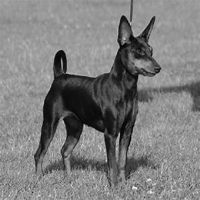

In [ ]:
image

In [ ]:
class PatchEmbedding:
    def __init__(self, patch_size=40):
        self.patch_size = patch_size

    def extract_patch(self,image):
        image= image[np.newaxis].transpose(0,1,2)
        num_of_img, height, width = image.shape
        p1, p2 = height//self.patch_size, width//self.patch_size
        patches = np.reshape(image, (num_of_img, p1 * p2,-1))
        return patches

    def positional_encoding(self,patch_size, emb_size):
        position = np.arange(0, patch_size)
        div_term = np.exp(np.arange(0, emb_size, 2) * -(np.log(10000.0) / emb_size))
        pos_enc = np.zeros((patch_size, emb_size))
        pos_enc[:, 0::2] = np.sin(position[:, np.newaxis] * div_term)
        pos_enc[:, 1::2] = np.cos(position[:, np.newaxis] * div_term)
        return pos_enc[np.newaxis]

    def embedding_patch(self, image):
        extract_patch= self.extract_patch(image)
        post_encoding= self.positional_encoding(extract_patch.shape[1], extract_patch.shape[2])
        img_array=extract_patch+ post_encoding
        image=(img_array - np.mean(img_array)) / np.std(img_array)
        return image

patch_embeding = PatchEmbedding().embedding_patch(image)
patch_embeding.shape

(1, 25, 1600)

In [ ]:
def PCA(X, n_components):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.dot(X_centered.T, X_centered) / (X.shape[0] - 1)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    selected_eigenvectors = eigenvectors[:, :n_components]
    X_pca = np.dot(X_centered, selected_eigenvectors)
    return X_pca

def data(data):
  new_data=[]
  for j in range(len(data)):
    image= (PatchEmbedding().embedding_patch(load_image(data[j])))[0,:,:]
    img_array = PCA(image, n_components=25)
    image=(img_array - np.mean(img_array)) / np.std(img_array)
    new_data.append(image[np.newaxis])
  return np.concatenate(new_data, axis=0)

X_train=data(X_train).real
X_test=data(X_test).real
X_train.shape, y_train.shape

((10000, 25, 25), (10000,))

### Self Attention Mode

In [ ]:
class SelfAttention:
    def __init__(self,dim, W_q, W_k, W_v,dropout=None):
        self.dim=dim
        self.W_q = W_q
        self.W_k = W_k
        self.W_v = W_v

    def stable_softmax(self,logits):
      max_logit = np.max(logits, axis= 1, keepdims=True)
      exp_logits = np.exp(logits - max_logit)
      softmax_probs = exp_logits / (np.sum(exp_logits, axis=1, keepdims=True))
      return softmax_probs

    def forward(self, x):
        q = np.dot(x, self.W_q)
        k = np.dot(x, self.W_k)
        v = np.dot(x, self.W_v)
        attn_score = np.dot(q, k.T) / np.sqrt(self.dim)
        attn_score= (attn_score-np.mean(attn_score))/np.std(attn_score)
        attn_score= self.stable_softmax(attn_score)
        Z = np.matmul(attn_score, v)
        return Z,attn_score
# W_q=W_k=W_v=np.random.rand(25,25)
# dim=25
# x=SelfAttention(dim,W_q,W_k,W_v).forward(X_train[50])
# x

### Neural Network Model

In [ ]:
class FeedForward:
    def __init__(self,W_f_1, W_f_2):
        self.W_f_1= W_f_1
        self.W_f_2 = W_f_2
    def stable_softmax(self,logits):
      max_logits = np.max(logits, keepdims=True)
      exp_logits = np.exp(logits - max_logits)
      softmax_probs = exp_logits / (np.sum(exp_logits, keepdims=True))
      return softmax_probs

    def forward(self, x):
        x=(x-np.mean(x))/np.std(x)
        hidden_output = np.dot(self.W_f_1.T, x)
        hidden_output = np.maximum(0, hidden_output)
        hidden_output=(hidden_output-np.mean(hidden_output))/np.std(hidden_output)

        hidden_output2 = np.matmul(self.W_f_2.T,hidden_output )
        hidden_output2 =(hidden_output2-np.mean(hidden_output2))/np.std(hidden_output2)
        hidden_output2 = self.stable_softmax(hidden_output2)
        return hidden_output2,hidden_output
# W_f_1=np.random.rand(625,200)
# W_f_2=np.random.rand(200,10)
# y=FeedForward(W_f_1, W_f_2).forward(x[0].reshape(-1))
# y

### Encode Block

In [ ]:
class Encoder_Classification():
  def __init__(self,X_train,X_test,y_train,y_test,dim,hidden_dim,out_dim,patch,num_epochs,alpha,lembda1,lembda2):
    self.X_train=X_train
    self.y_train=y_train
    self.X_test=X_test
    self.y_test=y_test
    self.dim=dim
    self.hidden_dim=hidden_dim
    self.patch=patch
    self.out_dim=out_dim
    self.num_epochs = num_epochs
    self.W_q = np.random.rand(self.dim, self.dim)
    self.W_k = np.random.rand(self.dim, self.dim)
    self.W_v = np.random.rand(self.dim, self.dim)
    self.W_f_1= np.random.randn(self.dim*self.patch, self.hidden_dim)
    self.W_f_2 = np.random.randn(self.hidden_dim, self.out_dim)
    self.alpha = alpha
    self.lembda1 = lembda1
    self.lembda2 = lembda2
    self.epoch_losses = []

  def one_hot(self,Y):
    one_hot_Y = np.zeros((Y.size, int(10)))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

  def stable_softmax(self,logits):
      max_logits = np.max(logits,keepdims=True)
      exp_logits = np.exp(logits - max_logits)
      softmax_probs = exp_logits / (np.sum(exp_logits,keepdims=True))
      return softmax_probs
  def cross_entropy_loss(self,y_true, y_pred):
      cross_entropy = -np.sum(y_true * np.log(y_pred))
      return cross_entropy

  def get_accuracy(self,predictions, Y):
      return (np.sum(predictions == Y) / Y.size)

  def forward(self, x):
      attn_output, attn_score =SelfAttention(self.dim,self.W_q, self.W_k, self.W_v).forward(x)
      hidden_output2, hidden_output1 = FeedForward(self.W_f_1, self.W_f_2).forward(attn_output.reshape(-1))
      return hidden_output2,hidden_output1,attn_output ,attn_score,

  def model_run(self):
    for epoch in range(self.num_epochs+1):
        batch_size=100
        number_batchs=self.X_train.shape[0]//batch_size
        for step in range(number_batchs):
            epoch_losses = []
            train_inputs, train_labels=self.X_train[batch_size*step:batch_size*(step+1)], self.y_train[batch_size*step:batch_size*(step+1)]
            for per_img in range(batch_size):
              train_input_np=train_inputs[per_img,:,:]
              class_index=np.array([train_labels[per_img]])
              labels_np = np.where(np.arange(self.out_dim) == class_index, 1, 0)
              hidden_out_2,hidden_out_1,attn_output,attn_score, = self.forward(train_input_np)
              train_predicted_labels=np.argmax(hidden_out_2)
              loss= self.cross_entropy_loss(labels_np,hidden_out_2)
              epoch_losses.append(loss)

              # Backpropagation
              m = batch_size
              one_hot_levels = labels_np
              dZ_f = (hidden_out_2 - one_hot_levels)
              d_W_f_2= 1. / m * np.dot(dZ_f[np.newaxis].T ,hidden_out_1[np.newaxis])
              dZ_1=np.matmul(self.W_f_2, dZ_f )* hidden_out_1
              d_W_f_1= 1. / m * np.matmul(dZ_1[np.newaxis].T ,attn_output.reshape(-1)[np.newaxis])
              dZ_attn=(np.matmul(self.W_f_1, dZ_1 )*  attn_output.reshape(-1)).reshape(self.patch,-1).T

              q = np.dot(train_input_np, self.W_q)
              k = np.dot(train_input_np, self.W_k)
              v = np.dot(train_input_np, self.W_v)
              grad_W_v = train_input_np.T @ attn_score @ dZ_attn.T
              grad_W_k = (train_input_np.T @ (attn_score * (dZ_attn.T @ v.T)).T @(q - attn_score @q))/ np.sqrt(self.dim)
              grad_W_q = (train_input_np.T @ ((attn_score * (dZ_attn.T @ v.T)) - (dZ_attn.T @ v.T)) @ k)/ np.sqrt(self.dim)

              d_W_f_1 = (d_W_f_1-np.mean(d_W_f_1))/np.std(d_W_f_1)
              d_W_f_2 = (d_W_f_2-np.mean(d_W_f_2))/np.std(d_W_f_2)
              grad_W_v = (grad_W_v-np.mean(grad_W_v))/np.std(grad_W_v)
              grad_W_k = (grad_W_k-np.mean(grad_W_k))/np.std(grad_W_k)
              grad_W_q = (grad_W_q-np.mean(grad_W_q))/np.std(grad_W_q)

              # Update model parameters
              grad_reg = self.lembda1 * self.W_q+ self.lembda2 * np.sign(self.W_q)
              self.W_q = self.W_q - self.alpha * (grad_W_q.T+grad_reg)
              grad_reg = self.lembda1 * self.W_k+ self.lembda2 * np.sign(self.W_k)
              self.W_k = self.W_k - self.alpha * (grad_W_k.T+grad_reg)
              grad_reg = self.lembda1 * self.W_v+ self.lembda2 * np.sign(self.W_v)
              self.W_v = self.W_v - self.alpha * (grad_W_v.T+grad_reg)

              grad_reg = self.lembda1 * self.W_f_1+ self.lembda2 * np.sign(self.W_f_1)
              self.W_f_1 = self.W_f_1 - self.alpha * (d_W_f_1.T+grad_reg)
              grad_reg = self.lembda1 * self.W_f_2+ self.lembda2 * np.sign(self.W_f_2)
              self.W_f_2 = self.W_f_2 - self.alpha * (d_W_f_2.T+grad_reg)

        if (epoch) % 2 == 0:
            predicted_text=[]
            print(f">>> Epoch {epoch} train loss: {np.mean(epoch_losses)}")
            epoch_losses = []
            train_acc_list=[]
            test_acc_list=[]
            batch_size=100
            number_batchs=self.X_test.shape[0]//batch_size
            for step in range(number_batchs):
              test_inputs, test_levels = self.X_test[batch_size*step:batch_size*(step+1)], self.y_test[batch_size*step:batch_size*(step+1)]
              for per_img in range(batch_size):
                inputs_np=test_inputs[per_img,:,:]
                test_class_index=np.array([test_levels[per_img]])
                test_labels_np = np.where(np.arange(self.out_dim) == test_class_index, 1, 0)
                test_out_final = self.forward(inputs_np)[0]

                test_predicted_levels= np.argmax(test_out_final)
                loss= self.cross_entropy_loss(test_labels_np,test_out_final)
                if epoch==self.num_epochs:
                  predicted_text.append(test_predicted_levels)
                epoch_losses.append(loss)

              if (step+1) % 40 == 0:
                train_acc=np.round(self.get_accuracy(train_predicted_labels, train_labels)*100,2)
                test_acc=np.round(self.get_accuracy(test_predicted_levels, test_levels)*100,2)
                print("\n Iteration: ",step+1,"    Training Accuracy: ",train_acc,"%    Test Accuracy: ",test_acc,"%")
            train_acc_list.append(1-train_acc/100)
            test_acc_list.append(1-test_acc/100)
            print(f">>> Epoch {epoch} test loss: ", np.mean(epoch_losses))
    return predicted_text

In [ ]:
y_pred= Encoder_Classification(X_train,X_test,y_train,y_test,dim=25,hidden_dim=200, out_dim=10, patch=25,
                               num_epochs=6,alpha=0.0001,lembda1=0.0005,lembda2=0.0005).model_run()

>>> Epoch 0 train loss: 2.5368449807055327

 Iteration:  40     Training Accuracy:  14.0 %    Test Accuracy:  13.0 %
>>> Epoch 0 test loss:  2.7083560495104195
>>> Epoch 2 train loss: 2.4705054429341877

 Iteration:  40     Training Accuracy:  9.0 %    Test Accuracy:  13.0 %
>>> Epoch 2 test loss:  2.6533380968312086
>>> Epoch 4 train loss: 2.427093605573181

 Iteration:  40     Training Accuracy:  12.0 %    Test Accuracy:  10.0 %
>>> Epoch 4 test loss:  2.604907023715888
>>> Epoch 6 train loss: 2.3665943684412394

 Iteration:  40     Training Accuracy:  9.0 %    Test Accuracy:  13.0 %
>>> Epoch 6 test loss:  2.5656481474521797


In [ ]:
y_pred=np.array(y_pred)
y_pred

array([9, 2, 9, ..., 6, 5, 0])

In [ ]:
def confusion_matrix(y_true, y_pred):
    num_classes = 10
    conf_matrix = np.zeros((num_classes, num_classes))
    for c in range(num_classes):
        for c_prime in range(num_classes):
            conf_matrix[c, c_prime] = np.sum((y_true == c) & (y_pred == c_prime))
    return conf_matrix

def f1_score(y_true, y_pred):
    num_classes = 10
    TP=FP=FN=0
    for c in range(num_classes):
        TP += np.sum((y_true == c) & (y_pred == c))
        FP += np.sum((y_true != c) & (y_pred == c))
        FN += np.sum((y_true == c) & (y_pred != c))
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_scores=(2 * (precision * recall) / (precision + recall))
    return f1_scores

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

f1 = f1_score(y_test, y_pred)
print("\nF1 Score of the model:", f1)

acc = accuracy(y_test, y_pred)
print(f"\nAccuracy: {acc*100}%")

Confusion Matrix:
[[40. 49. 56. 32. 27. 36. 33. 42. 49. 54.]
 [21. 45. 48. 30. 23. 30. 43. 43. 61. 49.]
 [43. 29. 73. 33. 17. 42. 32. 33. 33. 50.]
 [24. 17. 43. 43. 34. 28. 40. 31. 63. 51.]
 [38. 27. 52. 45. 43. 32. 33. 28. 63. 45.]
 [41. 42. 56. 37. 21. 33. 41. 26. 40. 51.]
 [31. 41. 53. 29. 22. 27. 54. 51. 50. 40.]
 [31. 39. 52. 36. 27. 21. 37. 47. 70. 51.]
 [34. 31. 32. 54. 43. 19. 26. 34. 88. 50.]
 [33. 28. 44. 43. 29. 34. 26. 33. 55. 91.]]

F1 Score of the model: 0.13925

Accuracy: 13.925%


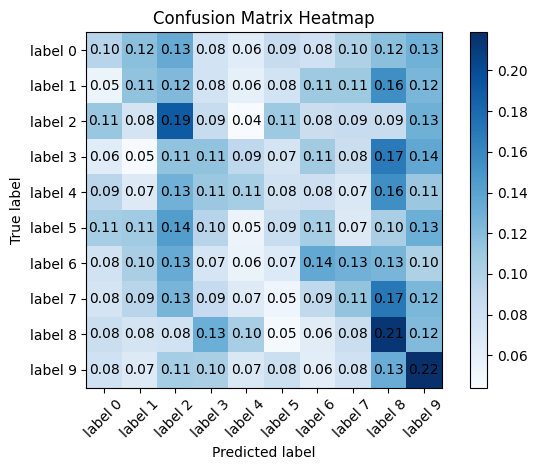

In [ ]:
normalized_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.imshow(normalized_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix Heatmap")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()

classes = ["label 0", "label 1", "label 2","label 3", "label 4", "label 5","label 6", "label 7", "label 8","label 9"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for (i, j), z in np.ndenumerate(normalized_matrix):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

# Question 3

In [ ]:
data=np.load('/content/drive/My Drive/Assignment_4_data_prnn/news_vectors.npy')
labels=np.load('/content/drive/My Drive/Assignment_4_data_prnn/labels.npy')

data = np.array(data)
labels = np.array(labels)
zero,one,two,three,four= np.sum(labels == 0),np.sum(labels == 1),np.sum(labels == 2),np.sum(labels == 3),np.sum(labels == 4)
five,six,seven,eight,nine,ten,eleven =np.sum(labels == 5),np.sum(labels == 6),np.sum(labels == 7),np.sum(labels == 8),np.sum(labels == 9),np.sum(labels==10),np.sum(labels==11)
zero,one,two,three,four,five,six,seven,eight,nine,ten,eleven

(5992, 5400, 17362, 6340, 6694, 8791, 35602, 6347, 5077, 9814, 9900, 17945)

In [ ]:
indeces=[]
for i in range(12):
    index = np.random.choice(np.where(labels == i)[0], size=3500, replace=False)
    indeces.append(index)
sample_indices = np.concatenate(indeces, axis=0)
np.random.shuffle(sample_indices)
text_train= data[sample_indices[:30000]]
lebels_train = labels[sample_indices[:30000]]
text_test = data[sample_indices[30000:]]
lebels_test = labels[sample_indices[30000:]]
text_train.shape,text_test.shape,lebels_train.shape, lebels_test.shape

((30000, 1000), (12000, 1000), (30000,), (12000,))

In [ ]:
class TextEmbedding:
    def __init__(self, token_size=40):
        self.token_size = token_size

    def extract_token(self,text):
        text= text[np.newaxis]
        num_of_text, text_dim = text.shape
        num_of_token = text_dim//self.token_size
        patches = np.reshape(text, (num_of_text, num_of_token,-1))
        return patches

    def positional_encoding(self,token_size, emb_size):
        position = np.arange(0, token_size)
        div_term = np.exp(np.arange(0, emb_size, 2) * -(np.log(10000.0) / emb_size))
        pos_enc = np.zeros((token_size, emb_size))
        pos_enc[:, 0::2] = np.sin(position[:, np.newaxis] * div_term)
        pos_enc[:, 1::2] = np.cos(position[:, np.newaxis] * div_term)
        return pos_enc[np.newaxis]

    def embedding_text(self, text):
        extract_token= self.extract_token(text)
        post_encoding= self.positional_encoding(extract_token.shape[1], extract_token.shape[2])
        text_array=extract_token+ post_encoding
        text=(text_array - np.mean(text_array)) / np.std(text_array)
        return text


In [ ]:
def data(data):
  new_data=[]
  for j in range(len(data)):
    text= (TextEmbedding().embedding_text(data[j]))[0,:,:]
    text=(text - np.mean(text)) / np.std(text)
    new_data.append(text[np.newaxis])
  return np.concatenate(new_data, axis=0)

text_train=data(text_train).real
text_test=data(text_test).real
text_train.shape, lebels_train.shape,text_test.shape, lebels_test.shape


((30000, 25, 40), (30000,), (12000, 25, 40), (12000,))

In [ ]:
text_Encoder_pred= Encoder_Classification(text_train,text_test,lebels_train,lebels_test,dim=40,hidden_dim=500, out_dim=12, patch=25,
                                          num_epochs=6,alpha=0.00001,lembda1=0.0001,lembda2=0.0001).model_run()

>>> Epoch 0 train loss: 2.9929429378482193

 Iteration:  40     Training Accuracy:  15.0 %    Test Accuracy:  5.0 %

 Iteration:  80     Training Accuracy:  15.0 %    Test Accuracy:  9.0 %

 Iteration:  120     Training Accuracy:  15.0 %    Test Accuracy:  7.0 %
>>> Epoch 0 test loss:  2.930380729707866
>>> Epoch 2 train loss: 2.994591144783061

 Iteration:  40     Training Accuracy:  8.0 %    Test Accuracy:  5.0 %

 Iteration:  80     Training Accuracy:  8.0 %    Test Accuracy:  9.0 %

 Iteration:  120     Training Accuracy:  8.0 %    Test Accuracy:  6.0 %
>>> Epoch 2 test loss:  2.913718317607618
>>> Epoch 4 train loss: 2.9367162519120713

 Iteration:  40     Training Accuracy:  8.0 %    Test Accuracy:  5.0 %

 Iteration:  80     Training Accuracy:  8.0 %    Test Accuracy:  9.0 %

 Iteration:  120     Training Accuracy:  8.0 %    Test Accuracy:  6.0 %
>>> Epoch 4 test loss:  2.8839527987578495
>>> Epoch 6 train loss: 2.8876364300048327

 Iteration:  40     Training Accuracy:  10.0 % 

In [ ]:
text_Encoder_pred = np.array(text_Encoder_pred)
print("\nPredected some 100 Labels")
text_Encoder_pred[:100]


Predected some 100 Labels


array([ 6,  6, 10, 10,  2,  5, 10,  2,  6,  8,  8, 10, 10,  1,  8,  0, 10,
        9,  7, 10,  8,  4, 10,  2,  4,  5,  5,  3,  5,  9,  7, 11,  5,  2,
        2,  5,  6,  9,  6,  8, 10,  7, 10,  7, 10,  5, 10,  6, 10,  4,  8,
        7, 10, 10,  6, 10,  7, 10,  3,  7, 10,  7,  2, 10, 10, 11,  7,  8,
        6, 10, 10, 10, 10,  4,  8,  2,  4,  8,  5, 10, 10,  5,  5,  7,  4,
        6,  7, 10,  2,  8,  1,  4,  1,  6,  5, 10, 11,  4, 10,  5])

In [ ]:
def confusion_matrix_text(y_true, y_pred):
    num_classes = 12
    conf_matrix = np.zeros((num_classes, num_classes))
    for c in range(num_classes):
        for c_prime in range(num_classes):
            conf_matrix[c, c_prime] = np.sum((y_true == c) & (y_pred == c_prime))
    return conf_matrix

def f1_score_text(y_true, y_pred):
    num_classes = 12
    TP=FP=FN=0
    for c in range(num_classes):
        TP += np.sum((y_true == c) & (y_pred == c))
        FP += np.sum((y_true != c) & (y_pred == c))
        FN += np.sum((y_true == c) & (y_pred != c))
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_scores=(2 * (precision * recall) / (precision + recall))
    return f1_scores

def accuracy_text(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

conf_matrix_text = confusion_matrix_text(lebels_test, text_Encoder_pred)
print("Confusion Matrix:")
print(conf_matrix_text)

f1_score = f1_score_text(lebels_test, text_Encoder_pred)
print("\nF1 Score for each class:", f1_score)

acc = accuracy_text(lebels_test, text_Encoder_pred)
print(f"\nAccuracy: { acc*100} %")

Confusion Matrix:
[[ 13.  69.  45.  45.  87.  70.  98. 105.  77.  21. 287.  51.]
 [ 13.  85.  52.  30.  93.  83.  68.  69.  54.  16. 363.  92.]
 [ 12.  74.  55.  19.  76.  70.  90.  99.  67.  22. 325.  52.]
 [ 13. 126.  48.  45.  87. 139.  73.  93.  66.  26. 253.  70.]
 [ 11.  65.  74.  32.  58.  94.  69.  57.  65.  23. 368.  80.]
 [ 15.  74.  81.  24.  84. 151.  95.  89.  67.  28. 209.  97.]
 [ 21.  77.  61.  46.  60.  88.  82.  76.  71.  26. 289.  74.]
 [ 13.  89.  68.  47.  77.  84.  83. 101.  56.  20. 305.  51.]
 [  9.  82.  62.  35.  87.  77.  73.  96.  96.  11. 357.  50.]
 [ 34.  84.  80.  30.  80.  88.  94.  78.  71.  50. 218. 111.]
 [ 10.  60.  65.  21.  94. 105.  93. 108.  56.  19. 271.  93.]
 [  9.  64.  96.  35.  81. 128.  87.  92.  73.  26. 184. 116.]]

F1 Score for each class: 0.09358333333333335

Accuracy: 9.358333333333334 %


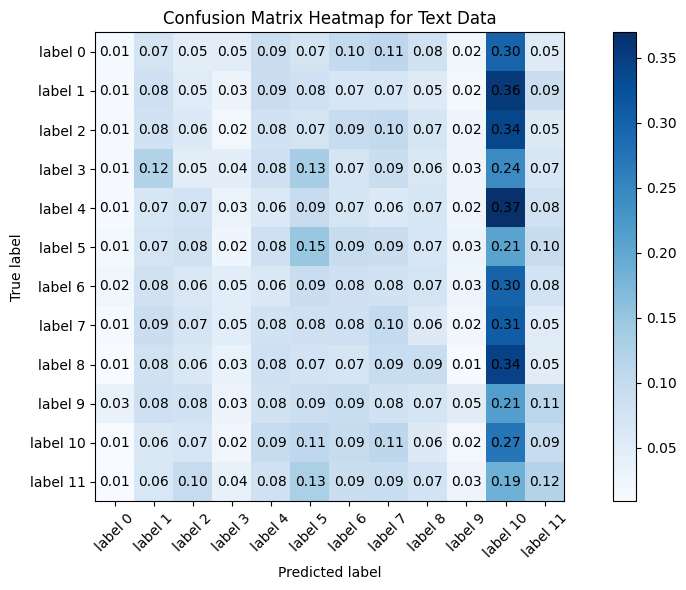

In [ ]:
normalized_matrix = conf_matrix_text.astype('float') / conf_matrix_text.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 6))
plt.imshow(normalized_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix Heatmap for Text Data")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()


classes = ["label 0", "label 1", "label 2","label 3", "label 4", "label 5","label 6", "label 7", "label 8","label 9","label 10","label 11"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for (i, j), z in np.ndenumerate(normalized_matrix):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()